# INFO 3350/6350

## Lecture 07: Classification

## To do

* Reading for section
    * Read articles by Allison et al. and by Mauch et al.

## Repeat: Supervised and unsupervised learning

* "Clustering" is a type of *unsupervised* learning
* "Classification" is a type of *supervised* learning
* **Both seek to assign a finite set of labels to input objects on the basis of features associated with those objects**
* In *supervised* learning, you know the labels in advance
    * You supply a set of (correctly) labeled objects to the algorithm
    * The algorithm then "learns" which features are associated with which labels, so as to minimize classification errors
* In *unsupervised* learning, you don't know the labels (though you might know how many labels there should be)
    * You supply a feature matrix and a definition of what a "good" clustering (label set) should be
    * The algorithm then assigns labels to the input objects so as to best satisfy the supplied definition of "good" (typically, minimizing variance within clusters and maximizing difference between clusters)

## Repeat: Why prefer one or the other?

* **Unsupervised** methods are often used early in a project, when you're looking for unknown stucture in your data
    * Unsupervised methods are your only option if you don't know what the appropriate set of labels might be for your data set
    * Also appropriate if you don't have (many) labeled instances
    * Also appropriate when you know and care a lot about the features themselves rather than the classes
        * Clustering produces a set of labels that are most compatible with the features (as well as the distance metric and learning algorithm, of course) that you've supplied.
    * Unsupervised methods are typically "cheap" to set up, but costly to evaluate
* **Supervised** methods require you to know in advance the full set of appropriate labels for your data
    * Supervised methods often have high initial costs, but are easier to evaluate (because you already have a set of correctly labeled instances that you can use for validation).
    * Appropriate when you care more about the output labels than the features.
        * Weighs features such that you produce the set of labels closest to the training data.
        * No guarantee that the features on which the supervised method relies will be the ones that you believe are abstracty important.
        That said, it's possible to examine (directly) or to evaluate (indirectly) the importance of specific features in a trained supervised model. This can be interesting if you want to understand the features on which the model relies most heavily.

## Machine learning glossaries

If you're finding yourself confused by some of the volcabulary of machine learning, here are two useful glossaries that may help:

* [Google's machine learning glossary](https://developers.google.com/machine-learning/glossary). Very extensive, leans toward neural methods.
* [A shorter glossary](https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html) for quicker reference.

## Some common classification algorithms

### *k* Nearest Neighbors
* Assign to new objects the most common label among *k* nearest neighbors in the training set
* Very low computational cost, easy to understand and interpret, and can fit complex decision spaces with ease
* Not usually the best performance for real-world cases

### Decision tree
* Select features that best split the training data, in descending order
* Need a measure of the empirical quality of the split imposed by a given partition 
    * We are trying to reduce entropy, that is, the mixing of the classes that would follow from splitting at a given value of a feature
    * Mutual information (MI, details to come when we discuss feature selection) is a typical metric to select the most informative features
        * MI is abstractly similar to correlation or covariance -- it's a measure of how much two variables change together. But MI doesn't assume a linear relationship between the variables and it's suitable for categorical data, so is often preferred when you don't know much about the relationships in your feature data.
* Highly interpretable
* Prone to **overfitting**
    * Minimize overfitting by limiting the depth of your tree pretty aggressively (that is, by considering only the most informative features)

<img src="./images/Decision_Tree.jpg">

Theft in Old Bailey cases:
<img src="./images/example_tree.png">

### Random forest
* Create many different decision trees trained on different subsets of your data
* Class label by majority vote of the different trees
* Improves overfitting of single decision trees, at the cost of interpretability

### Logistic regression
* Begin with the intuition that the value of each feature measured for each object pushes us (and our classifier) toward the belief that the object belongs to one category or another.
    * Features may be in conflict, in the sense that an object may have some features that are associated with one class and others that are associated with another class.
    * We want to assign an object to the category that best aligns with its features overall.
* Fit training data to a linear model: $z = W_0 + W_1 x_1 + W_2 x_2 + ...$
    * Note that values of $z$ can range from -infinity to + infinity
    * This linear function summarizes our evidence
    * More positive values suggest membership in one class; more negative values suggest membership in the other class
* Transform the linear value into a score between 0 and 1 using the sigmoid function: $$\sigma(z) = \frac{1}{1 + e^{-z}}$$
    * This alows us to transform the infinite range of evidentiary values from the linear model into a value that ranges from zero to one and that we can interpret as a probability of membership in the target class.
* Sigmoid function looks like this:
    
<img src="./images/sigmoid.png">

* Logistic regression:
    * Is pretty interpretable
    * Is relatively lightweight
    * Often performs acceptably
    * Is the main basis for neural networks, where each neuron is in effect a logit classifier

### Naïve Bayes
* Bayes' Rule: $p(C|x_1 , ..., x_n) \propto p(C)\prod_{i=1}^{n} p(x_i | C)$
* Read: "The probability of class $C$ given the values in vector $x$ equals the underlying probability of class $C$ times the probabilities of those feature values given class $C$."
* This allows you to transform a difficult (or impossible) measurement, the probability of class membership given observed evidence, into an easy (or easier) one that involves the probability of seeing certain evidence given class membership.
* $x_i$ is the value of feature $i$ in the vector $x$
* The latter part -- the underlying proabability of class $C$ and the probability of the feature values given class $C$ -- is what you learn from your training data.
* You can then assign class labels in your test set on the basis of the class with the highest predicted probability given the evidence.
* Note difference between Bernoulli, Gaussian, and multinomial NB (each of which is a different classifier type in `sklearn`): 
    * Bernoulli NB is for use with binary features (encoding the presence or absence of a word type in a document, for example). You would use this if you binarized your features at vectorization.
    * Multinomial NB is for features that take integer values, such as ordinary word count.
    * Gaussian NB is for use with continuous variables, including TF-IDF weighted and/or normalized word counts.
    * `sklearn` will often take care of reformatting your data for use with the NB classifier you select, but it may not result in the treatment you intended.

### SVM
* A linear (by default) method based on finding the line or plane that separates classes with maximum margin.
    * Think of this as a line of "worst fit," in contrast to the line of best fit for a regression model.
    * The *support vectors* are the objects closest to the decision boundary, i.e., those that would *change* the boundary if they were removed.
* Can be extended to nonlinear hyperplanes via kernel functions.
    * A kernel function maps input points to a higher-dimensional space in which the inputs *are* linearly separable.
* A classic approach to text classification (developed in the 1990s, in part by Thorsten Joachims here at Cornell; underpinnings extend back to the 1960s).

## An artificial example

Let's try a few different classifiers in `sklearn`. We'll create four artificial blobs of varying density.

**NB.** We use the `make_blobs` function to create synthetic data for purposes of illustration. This has no role in actual clustering or classification problems. Don't try to use `make_blobs` as part of your approach to learning from real data.

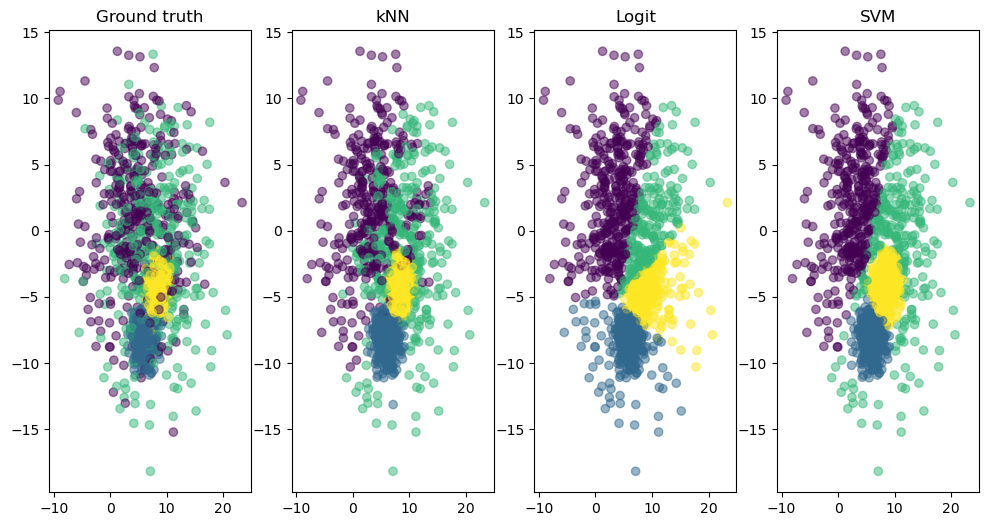

kNN score:   0.814
Logit score: 0.689
SVM score:   0.768

kNN score, cross validated:   0.745
Logit score, cross validated: 0.685
SVM score, cross validated:   0.758


In [1]:
# A few sklearn classifiers on synthetic data

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# data parameters
n_samples = 1500
n_blobs=4

# make data with different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, 
    centers=n_blobs,
    cluster_std=np.random.choice( # randomize variance of each cluster
        [1.0, 5.0, 2.0], 
        size=n_blobs, 
        replace=True
    )
)

# knn
knn_clf = KNeighborsClassifier(n_neighbors=5) # instantiate
knn_clf.fit(X_varied, y_varied)               # fit
y_knn = knn_clf.predict(X_varied)             # predict

# logistic regression
logit_clf = LogisticRegression()
logit_clf.fit(X_varied, y_varied)
y_logit = logit_clf.predict(X_varied)

# svm
svm_clf = SVC()
svm_clf.fit(X_varied, y_varied)
y_svm = svm_clf.predict(X_varied)

# plot results
# set up plot
plt.figure(figsize=(12, 6))
# input data
plt.subplot(141)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied, alpha=0.5)
plt.title("Ground truth")
# knn
plt.subplot(142)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_knn, alpha=0.5)
plt.title("kNN")
# logit
plt.subplot(143)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_logit, alpha=0.5)
plt.title("Logit")
# svm
plt.subplot(144)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_svm, alpha=0.5)
plt.title("SVM")
plt.show()

# scoring (naive, not cross-validated)
print(f"kNN score:   {knn_clf.score(X_varied, y_varied):.3f}")
print(f"Logit score: {logit_clf.score(X_varied, y_varied):.3f}")
print(f"SVM score:   {svm_clf.score(X_varied, y_varied):.3f}")

# scoring (with cross validation)
print(f"\nkNN score, cross validated:   {np.mean(cross_val_score(knn_clf, X_varied, y_varied)):.3f}")
print(f"Logit score, cross validated: {np.mean(cross_val_score(logit_clf, X_varied, y_varied)):.3f}")
print(f"SVM score, cross validated:   {np.mean(cross_val_score(svm_clf, X_varied, y_varied)):.3f}")

Note the modest difference in accuracy that comes from cross validation (not fitting and testing on the same data).

## Scoring and cross validation

### Measuring classifier performance

In this lecture -- and for the next couple of weeks -- we'll talk about factors that affect classifier performance. But how should we *measure* performance? 

In the example above, we scored our classifiers on **accuracy**, that is, the fraction of all predictions that are correct. This can be fine, but it's not well suited to cases in which we have different-size classes and it doesn't capture whether we do equally well on any one class.

Machine learning tends instead to measure performance using **precision**, **recall**, and $F_1$. Here's what those terms mean:

* **Precision** is the fraction of positive predictions for a given class that are correct. In other words, when we predict that an object belongs to a class, how likely are we to be right about it?
* **Recall** is the fraction of all positive instances in the data set that are predicted positive. In other words, from among all the objects we *should* have assigned to a class, what fraction of them did we catch?

You can see that precision and recall tend to involve a tradeoff in real-world settings. You can achieve high precision if you're very conservative about labeling marginal cases. You can get high recall by being much more liberal with your labels. Consider two limit cases of a simple problem:

> I ask you to bring me all the books by Toni Morrison that are held in the Cornell libraries. Favoring precision, you bring me just one book, a first-edition copy of _The Bluest Eye_ (great book, by the way) and nothing else. You're right that it's by Morrison, so your precision is perfect (1.0). But your recall is really bad. If there are 108 Morrison volumes in the library (which there are, for certain deifnitions of "by", "in", "Cornell," "libraries," and "books"), you have correctly retrieved less than 1% of them. Or maybe you favor recall, so you bring me every book in the library (about 8 million of them). Yikes. In this case, recall is perfect (you *did* bring me every book by Morrison), but your precision is terrible (of the 8 million books you labeled as "by Toni Morrison," only 108 of them were correct (about 0.001%).

* $F_1$ is one way to assess the combination of precision and recall. It's just the *harmonic mean* of those two numbers. A harmonic mean is a conservative estimate of the average value, because it is affected more by small values than by large ones. 
    * You don't really need to know how to calculate $F_1$, but it's not hard. You take the reciprocal of the (familiar, plain vanilla) arithmetic mean of the reciprocals of your observations.
    * In the first Morrison example (high precision, low recall), precision = 1.0 and recall = 0.01 (rounding a bit). 
    * The regular (non-harmonic) mean would be about 0.5 ($=(1.0 + 0.01)/2$)
    * $F_1$ is:
    
$$F_1 = \left( \frac{1.0^{-1}+0.01^{-1}}{2} \right)^{-1} = \frac{2}{1 + 100} = 0.02$$

$F_1$ for the high-recall case would be even worse, since precision in that case is even closer to zero. Most real-world cases aren't as extreme as these, but the idea is the same. $F_1$ avoids artificially inflated estimates of classifier performance. In general, it's what you (and other machine learning researchers) want to use as your accuracy/performance metric.

### Cross validation

You'll have noticed that we presented our scores above both with and without **cross validation**, and that the cross-validated numbers were lower. What's that about?

When you train a classifier (or any other learning system), you're learning things about the structure of your data. You do that by associating feature values with expected outputs (such as class labels, numerical values, etc.). You measure the performance of the system by evaluating how often the predictions of the system are correct (or by how much they are incorrect).

If you train and test on the same data, you're at risk of **overfitting**, that is, of learning very specific details of your training data that will not generalize to new data sampled from the same underlying population (but that is not identical to the training data). You run this risk because you never examine any new data for which you know the true labels, so you can't measure how your system performs on unseen data.

A wise approach, then, is to **hold out** some of your labeled data as a test set. You then train on the rest and evaluate the performance of the model on the held-out data.

But what if the data you've held out just happens to be non-representative of the full data set (as might happen if you don't have very much labeled data to begin with, or if its features are somehow unevenly distributed in ways unknown to you)? Or what if you just get (un)lucky with any particular **train-test split**? You can minimize that problem by performing multiple train-test splits (perhaps five or ten of them, say), each time holding out a different subset of the labeled data and training over the rest.

Evaluating performance over multiple different train-test splits is called **cross validation**. It is always best practice to report the performance of a classifier (or any other learning system) using cross validation. At minimum, you should report the average performance across all splits (also called **folds**, as in *k*-fold cross validation). In a perfect world, you might perform very many randomized splits and report both the mean and some measure of dispersion (like standard deviation or a confidence interval).

Always assume that you should perform cross validation for any supervised system, unless you have a very good reason not to. (Whatever reason you're thinking of, it's probably not good enough.)

## A real-world example: Cookbooks (again)

In the clustering lecture, we examing the difference between bread recipes and meat recipes using unsupervised methods. Let's try the same thing, but using the true labels that we possess.

In [2]:
# read the data
import os
import pandas as pd
cook = pd.read_csv(os.path.join('..', 'data', 'cookbooks', 'feeding-america.csv'))

# subset the data to bread recipes and meat recipes
breadmeat = cook.loc[cook.recipe_class.isin(["breadsweets", "meatfishgame"])]

# vectorize
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    use_idf=False,
    tokenizer=lambda x: x.split(';'), # use existing tokenization by ingredient
    token_pattern=None,
    min_df=100 # limit to common ingedients
)
features = vectorizer.fit_transform(breadmeat['ingredients'])
print("Feature matrix shape:", features.shape)

Feature matrix shape: (26107, 240)


/Users/wilkens/anaconda3/envs/3350/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/wilkens/anaconda3/envs/3350/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/wilkens/anaconda3/envs/3350/lib/python3.11/site-packages/umap/d

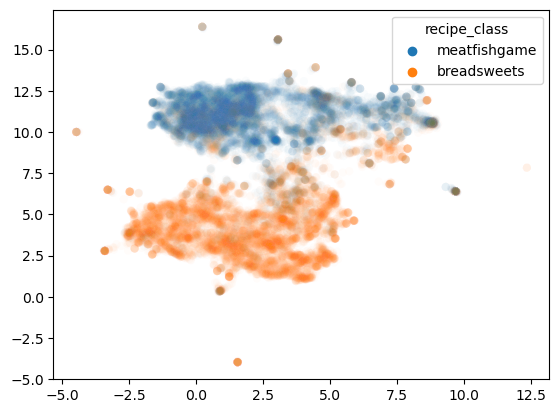

CPU times: user 1min 41s, sys: 2.12 s, total: 1min 43s
Wall time: 56.4 s


In [3]:
%%time
# vis with UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP

X_umap = UMAP().fit_transform(features)
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=breadmeat['recipe_class'], alpha=0.02)
plt.show()

In [4]:
%%time
# fit and score the same classifiers as above
# scoring (with cross validation)
print(f"\nkNN score, cross validated:   {np.mean(cross_val_score(knn_clf, features, breadmeat['recipe_class'])):.3f}")
print(f"Logit score, cross validated: {np.mean(cross_val_score(logit_clf, features, breadmeat['recipe_class'])):.3f}")
print(f"SVM score, cross validated:   {np.mean(cross_val_score(svm_clf, features, breadmeat['recipe_class'])):.3f}")


kNN score, cross validated:   0.906
Logit score, cross validated: 0.922
SVM score, cross validated:   0.930
CPU times: user 2min 27s, sys: 1.74 s, total: 2min 29s
Wall time: 1min 59s


You'll want to take a look at the [documentation for `cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Note in particular that, by default, the function performs 5-fold cross validation and reports the score using each classifier's default scoring method (which is often accuracy rather than F1).

Here's how you'd use a different scorer:

In [5]:
from sklearn.preprocessing import LabelBinarizer

score = np.mean(
    cross_val_score(
        estimator=logit_clf, 
        X=features, 
        #y=breadmeat['recipe_class'] # why not this?
        y=LabelBinarizer().fit_transform(breadmeat['recipe_class']).ravel(),
        scoring='f1',
        cv=5
      ))
print(f"""Logit score, cross validated, f1: {score:.3f}""")

Logit score, cross validated, f1: 0.912


For reference, here's how we'd perform a single train-test split, followed by evaluation on held-out data:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, breadmeat['recipe_class'], test_size=0.2)
print("Size of full data:", features.shape)
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Size of full data: (26107, 240)
Train set size: (20885, 240)
Test set size: (5222, 240)


And a convenient format for examining predicted labels vs. true labels, without regard to the system that produced each of them:

In [7]:
from sklearn.metrics import classification_report

logit_clf.fit(X_train, y_train)
y_pred = logit_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 breadsweets       0.94      0.92      0.93      2907
meatfishgame       0.90      0.92      0.91      2315

    accuracy                           0.92      5222
   macro avg       0.92      0.92      0.92      5222
weighted avg       0.92      0.92      0.92      5222

